# GENDER AND EXTREMISM ON TWITTER IN THE ASIA AND PACIFIC REGION [PILOT STUDY]

In this notebook, we analyze tweets from Bangladesh for the past 6 months. We extract keywords and explore their frequency. Then we move on to our subject matter and focus on tweets related to woman/women. We explore the keywords associated with the words woman/women. Finally, we produce a visualization of the keywords and their frequencies in the form of word clouds. The output of this analysis is as follows:
- Top 100 keywords from the tweets.
- Top 100 keywords associated with the word 'woman'.
- Top 100 keywords associated with the word 'women'.
- Top 500 keywords associated with both the word 'women'/'woman' combined.
- Word cloud visualization of all tweets.
- Word cloud visualization of tweets that contain the words 'woman'/'women'.
- A visual comparison of the proportion of tweets that are focused on the subject matter.

### Importing all necessary libraries

In [2]:
import pandas as pd
import operator 
import json
from collections import Counter
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from matplotlib.externals import six
import re

### Loading data

In this analysis, we only take into account the tweets in English

In [5]:
tweets = get_data('tweets_Bangladesh.csv')
data.head()

Total dataset shape: (8377563, 32)
English tweets shape: (6913412, 32)


0    Entrepreneur: Be Ready to Pounce When You Fina...
1    RT @juliavkalman: frustrating how often people...
2    RT @KanteStop: Why should Guardiola manage Wes...
3    RT @Thrones_Memes: It's good to have the Hound...
4    I posted a new photo to Facebook https://t.co/...
Name: tweet, dtype: object

In [ ]:
tweets.head()

## Counting frequencies

### Getting rid of general stopwords plus twitter specific stopwords like, RT,via,etc.

In [6]:
twitter_stopwords =  ['rt', 'via', 'RT', '...', "\'",'..', 'u', "i\'m", 'https', 'it\'s', u'â€¦', u'https://...', 'enbusiness_news', 'n', 'r', 'vs', u'â€™', u'â€”', u'https://â€¦', u'â€œ', u'â€', u'â€˜' ]
digits = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + twitter_stopwords + digits

### Counting word frequency

In [28]:
count_all, count_woman, count_women, count_combined, all_tweets, w_tweets = get_keyword_counts(tweets, stop)

### Get the top N counts

In [30]:
top100_df = get_top_N(count_all, 104)
top100_woman_df = get_top_N(count_woman, 106)
top100_women_df = get_top_N(count_women, 109)
top500_combined_df = get_top_N(count_combined, 523)

## Show top words in tabular format

In [ ]:
print (top100_df)

In [ ]:
print (top100_woman_df)

In [ ]:
print (top100_women_df)

In [ ]:
print (top500_combined_df)

### Save keywords to csv file

In [114]:
top100_df.to_csv('top100.csv')


top100_woman_df.to_csv('top100woman.csv')


top100_women_df.to_csv('top100women.csv')

top500_combined_df.to_csv('top500combined.csv')

### Generate Word Clouds 

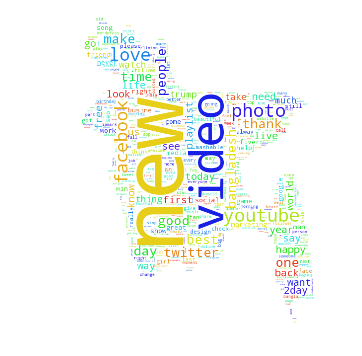

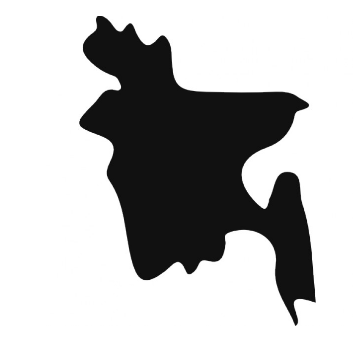

In [35]:
generate_wordcloud(all_tweets, "bd_map.jpeg", "all_test.png", ['https', 'co'])

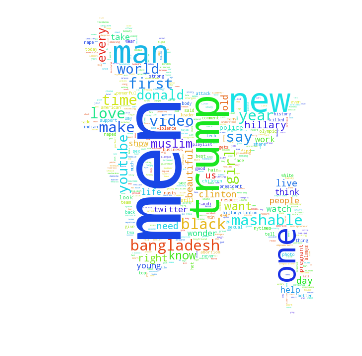

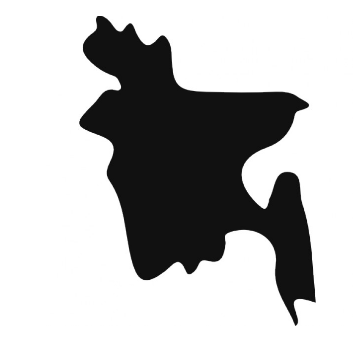

In [41]:
generate_wordcloud(w_tweets, "bd_map.jpeg","w_test.png", ["https", "woman", "women", "co"])

## Comparison of tweets related to subject matter to overall dataset

In [90]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

    
                




In [92]:
tweets_df = pd.DataFrame()
tweets_df['text'] = tweets

In [93]:
tweets_df['woman'] = tweets_df['text'].apply(lambda text: word_in_text('woman', text))
tweets_df['women'] = tweets_df['text'].apply(lambda text: word_in_text('women', text))

In [94]:
woman_tweets = tweets_df['woman'].value_counts()[True] + tweets_df['women'].value_counts()[True]
other_tweets = len(tweets_df) - woman_tweets
print ("Number of tweets containing the word 'woman'"+tweets_df['woman'].value_counts()[True])
print ("Number of tweets containing the word 'woman'"+tweets_df['women'].value_counts()[True])
print ("Number of tweets that don't contain the above words"+other_tweets)

21649
42733
6849030


### Visual comparison of tweets on the subject matter to other tweets

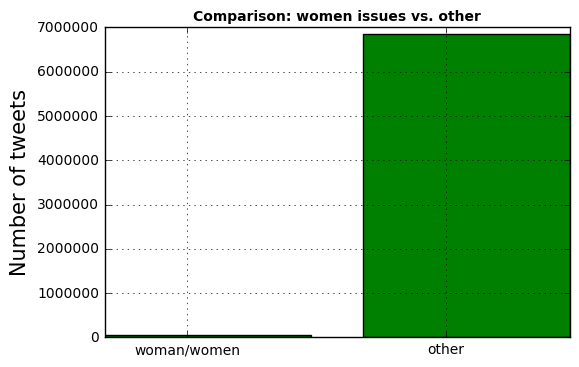

In [98]:

topics = ['woman/women', 'other']
tweets_by_topic = [woman_tweets, other_tweets]

x_pos = list(range(len(topics)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_topic, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Comparison: women issues vs. other', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(topics)
plt.grid()
plt.show()
plt.clf()
plt.cla()
plt.close()

### Conclusion and Recommendation

The duration of the collected data coincided with the US election period. That explains the high association with words like Trump and Hillary. Words like men, man, love, beautiful have come up quite frequently. It is important to note that words like attack, rape, violence, nasty, abortion, etc have also come up quite frequently in these tweets which hint to the tensions in gender issues in the region.

Use of twitter is fairly limited in Bangladesh. The portion of Bangladeshis that do use twitter are from a very narrow cross-section of the society, mostly the urban upper, upper-middle class. That explains the fairly modest amount of tweets regarding the subject matter. Focusing on facebook may yield better discovery in this regard as facebook has penetrated nearly all social classes in Bangladesh.

## Functions

### Function to get tweets

In [1]:
## function to load data. input: csv file name. output: dataset for tweets in english
def get_data(filename):
    data = pd.read_csv(open(filename,'r'))
    
    en_tweets = data[data['language']=='en']
    print ("Total dataset shape:", data.shape)
    print ("English tweets shape:", en_tweets.shape)
    tweets = en_tweets['tweet']
    return data, tweets

### Function to get counts and text

In [27]:
# function to get counters of tweets. input: tweets and stopwords list. output: 4 counters and 2 strings (all text, woman text).
def get_keyword_counts(tweets, stop):
    tknzr = TweetTokenizer(preserve_case=False, reduce_len=True)
    
    ## find associated words with woman/women
    search_word1 = 'woman'
    search_word2 = 'women'
    ##counters for gathering keywords and their frequencies
    t_count_all = Counter() 
    count_search1 = Counter()
    count_search2 = Counter()
    count_search_combined = Counter()
    # make all the tweets a single text without stopwords for wordcloud
    all_tweets = ''
    # make all women/woman associated tweets a single text without stopwords for wordcloud
    w_tweets = ''
    for tweet in tweets:
            # Create a list with all the terms
            t_terms_all = [term for term in tknzr.tokenize(tweet) if term not in stop]
            all_tweets += ' '.join(t_terms_all)
            # Update the counter
            t_count_all.update(t_terms_all)
            #create keyword associated list of frequent words
            if search_word1 in t_terms_all:
                count_search1.update(t_terms_all)
                w_tweets += ' '.join(t_terms_all)

            if search_word2 in t_terms_all:
                count_search2.update(t_terms_all)
                if search_word1 not in t_terms_all:
                    w_tweets += ' '.join(t_terms_all)
            if search_word1 in t_terms_all or search_word2 in t_terms_all:
                count_search_combined.update(t_terms_all)
    return t_count_all, count_search1, count_search2, count_search_combined, all_tweets, w_tweets

## Getting tweet counts for top500

### Function to get top N counts

In [13]:
def get_top_N(counter, n):
    return pd.DataFrame(counter.most_common(n), columns=['word', 'count'])

### Function to generate wordcloud

In [39]:
def generate_wordcloud(text, maskfile, output, stops=None):
    # Read the whole text.
    text = text

    # read the mask image

    map_mask = np.array(Image.open(maskfile))

    stopwords = set(STOPWORDS)
    if stops is not None:
        for word in stops:
            stopwords.add(word)
    
        
    


    wc = WordCloud(background_color="white", max_words=2000, mask=map_mask, stopwords=stopwords)
    
    # generate word cloud
    wc.generate(text)

    # store to file
    wc.to_file(output)

    # show
    plt.imshow(wc)
    plt.axis("off")
    plt.figure()
    plt.imshow(map_mask, cmap=plt.cm.gray)
    plt.axis("off")
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()
